In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/dataset/Advertising.csv',encoding='latin')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
dataset.head(4)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5


In [ ]:
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
dataset.shape

(200, 5)

<ipython-input-6-f40132291331>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Sales"], hist=False)


<Axes: xlabel='Sales', ylabel='Density'>

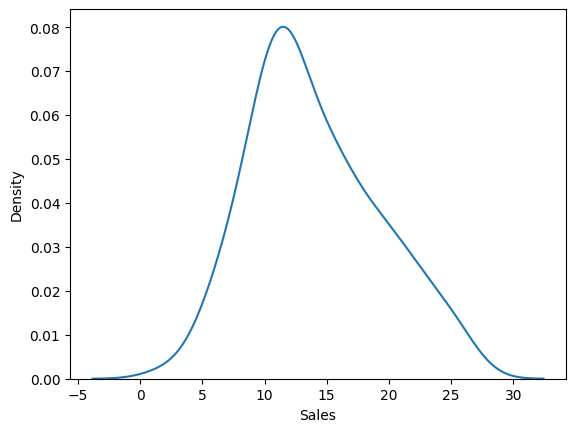

In [ ]:
sns.distplot(dataset["Sales"], hist=False)

<ipython-input-7-30b6c1d7e947>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.Sales,color="r",ax=axes[0,0])
<ipython-input-7-30b6c1d7e947>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.TV,hist=False,rug=True,color="b",ax=axes[0,1])
<ipython-input-7-30b6c1d7e947>:5: 

<Axes: xlabel='Newspaper', ylabel='Density'>

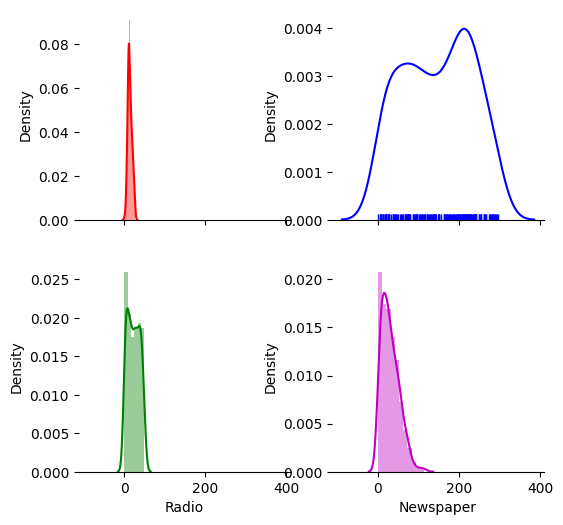

In [ ]:
f, axes=plt.subplots(2,2,figsize=(6,6),sharex=True)
sns.despine(left=True)
sns.distplot(dataset.Sales,color="r",ax=axes[0,0])
sns.distplot(dataset.TV,hist=False,rug=True,color="b",ax=axes[0,1])
sns.distplot(dataset.Radio,color="g",ax=axes[1,0])
sns.distplot(dataset.Newspaper,color="m",ax=axes[1,1])

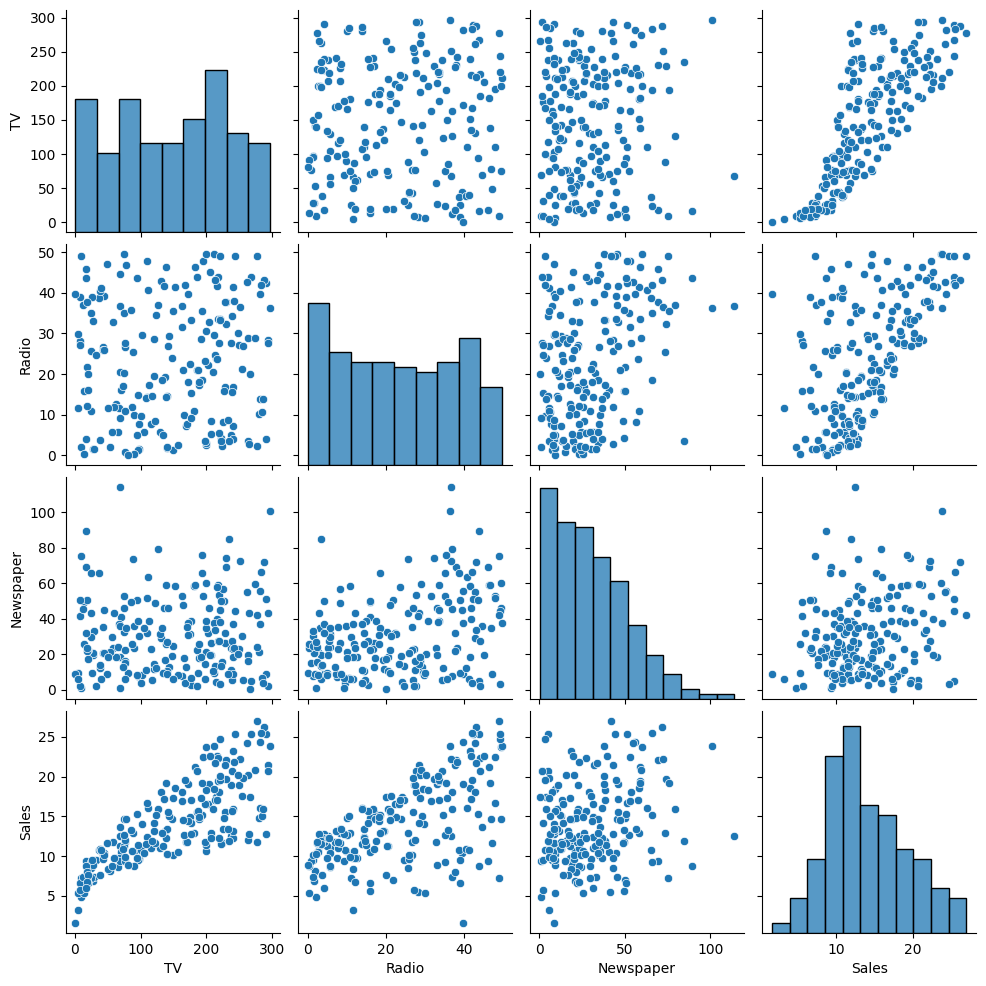

In [ ]:
sns.pairplot(dataset)
plt.show()

In [ ]:
dataset.drop(columns=["Unnamed: 0"],inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
dataset.shape

In [ ]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
X = dataset.drop(columns=["Sales"])
Y = dataset["Sales"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [ ]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
Sc = StandardScaler()
x_train  = Sc.fit_transform(x_train)
x_test  = Sc.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,y_pred)

1.79187485984694

In [ ]:
mean_squared_error(y_test,y_pred)

4.4557255924555275

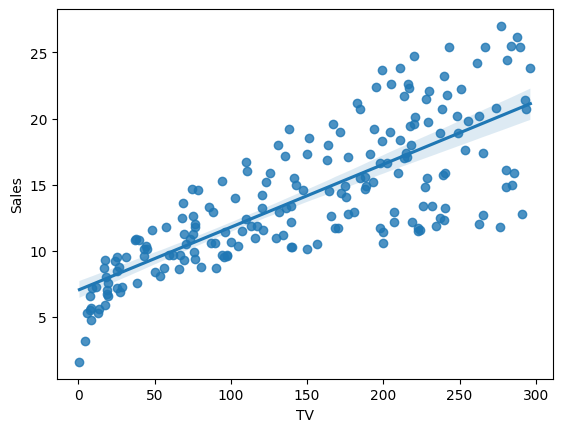

In [ ]:
sns.regplot(x = 'Newspaper' , y ='Sales', data = dataset)
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.show()

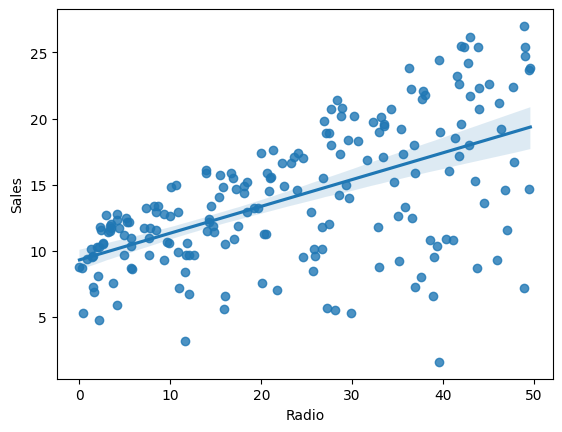

In [ ]:
sns.regplot(x = 'Radio' , y ='Sales', data = dataset)
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show()

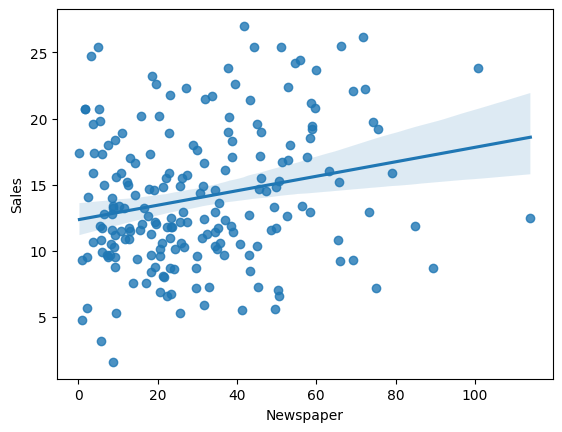

In [ ]:
sns.regplot(x = 'TV' , y ='Sales', data = dataset)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()